# Visualize the integral diagnostics

This notebook is a work in progress. To generate meaningful plots, I need to run at least one more simulation. Currently, the plots only show results for the non-Reactant simulation using double precision. I'm pushing the notebook now so you can get started.

In [1]:
using Pkg
Pkg.activate("../.")

  Activating project at `/global/cfs/cdirs/m4746/Users/nora/GB-25`


In [2]:
using CairoMakie
using Oceananigans
using Printf

┌ Warning: You are using Julia v1.11 or later!"
│ Oceananigans is currently tested on Julia v1.10."
│ If you find issues with Julia v1.11 or later,"
│ please report at https://github.com/CliMA/Oceananigans.jl/issues/new
└ @ Oceananigans /global/cfs/projectdirs/m4746/Users/nora/.julia/packages/Oceananigans/kw9Pz/src/Oceananigans.jl:118


In [42]:
dir = "/pscratch/sd/n/nloose/GB-25/simulations/"

"/pscratch/sd/n/nloose/GB-25/simulations/"

## Float32 vs. Float64 and GPU vs. Reactant

### Compare kinetic energy evolution

In [58]:
function vis_ke_evol(dir; resolution, Nz, momentum_advection_order=5, tracer_advection_order=5, vorticity_order=nothing)
    pt = 4 / 3
    fig = Figure(; size=(900, 500), fontsize=12pt)

    title = "Kinetic Energy, horizontal resolution: $resolution °, Nz = $Nz"

    ax = Axis(fig[1, 1], xlabel="Time (days)", ylabel="m⁵/s²", title=title)

    # Get file prefix
    if resolution isa Rational
        res_str = "$(numerator(resolution))_$(denominator(resolution))"
    else
        res_str = "$(Int(resolution))"
    end
    vort_str = vorticity_order !== nothing ? "_vort$(vorticity_order)" : ""

    for arch_str in ["GPU", "Reactant"]
        for FT in [Float32, Float64]
            # Generate prefix using parameter values
            prefix = (
                "Degree$(res_str)_Nz$(Nz)_"
                * "momadv$(momentum_advection_order)_tradv$(tracer_advection_order)"
                * vort_str * "_$(FT)_$(arch_str)"
            )
            filename = joinpath(dir, prefix * "_integrals.jld2")
            println("Checking file: $(filename)")
    
            if isfile(filename)
                Et = FieldTimeSeries(filename, "kinetic_energy_integral")
                times = Et.times / 3600 / 24
                data = Et.data[1, 1, 1, :]

                label = ("$arch_str, $FT")
                lines!(ax, times, data, linewidth=4, label=label)
            end
        end
    end
    # Add legend
    legend = Legend(fig[1, 2], ax, orientation=:vertical)  # One column
    return fig
end

vis_ke_evol (generic function with 1 method)

Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_Reactant_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_Reactant_integrals.jld2


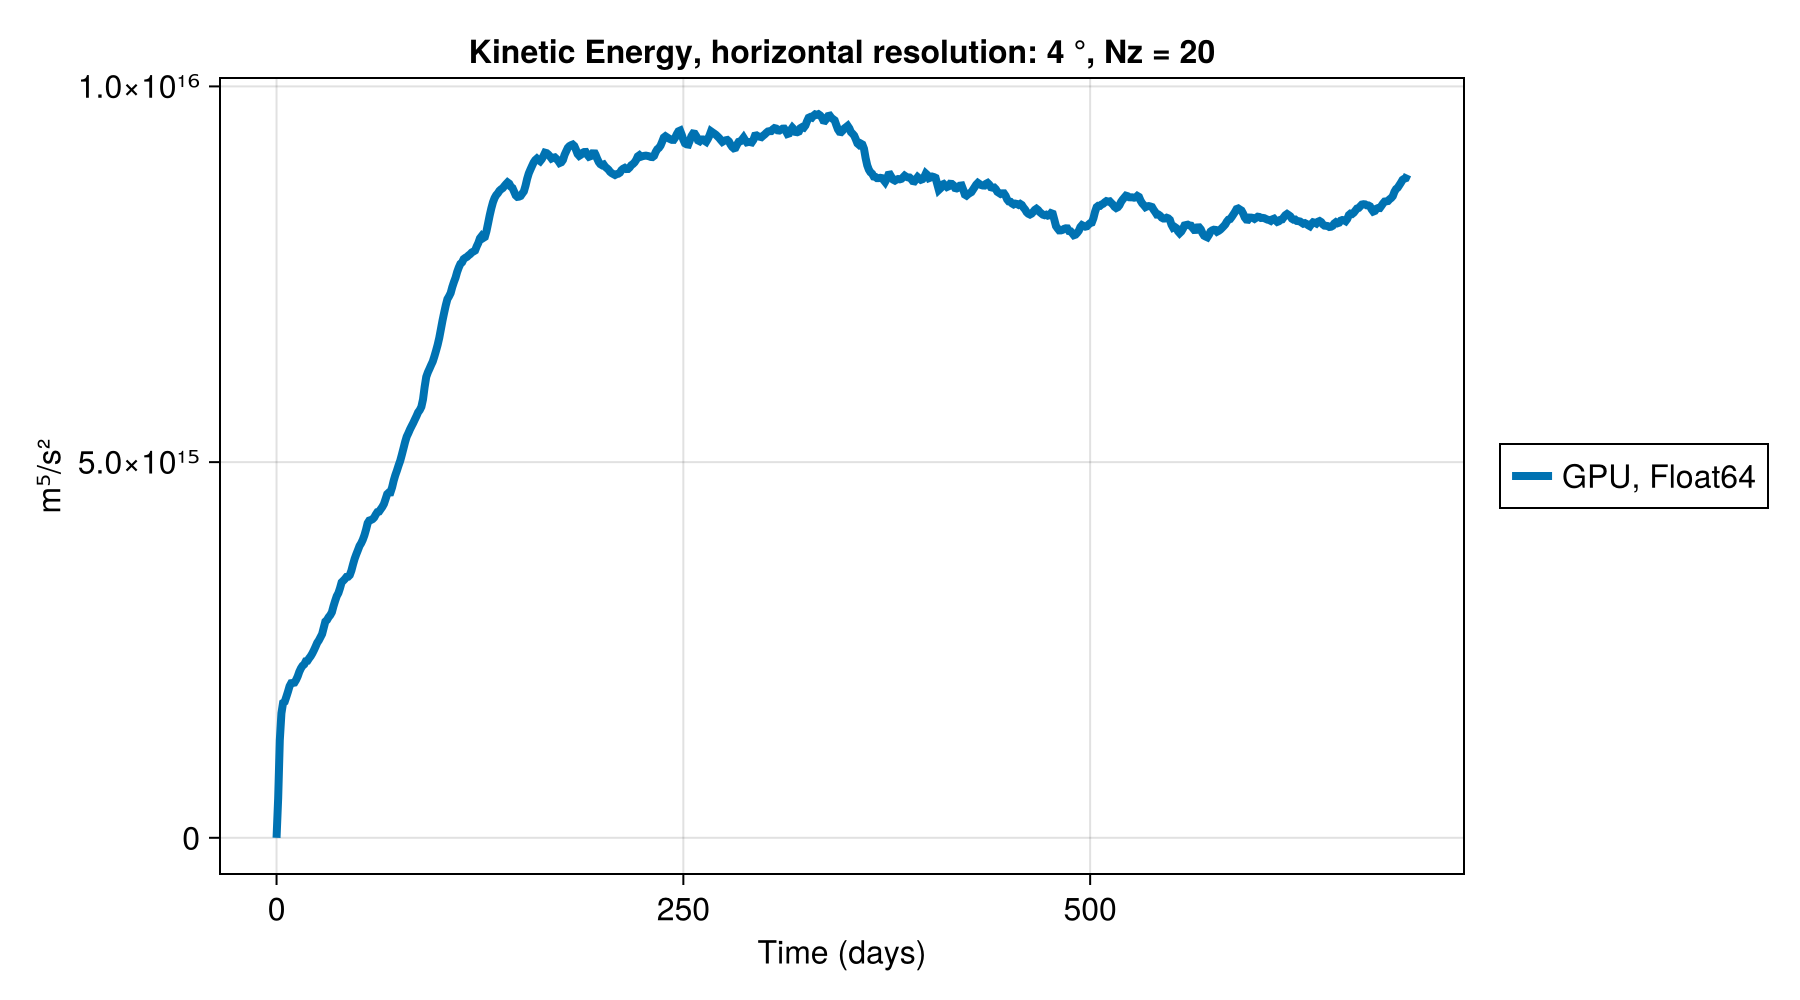

In [59]:
fig = vis_ke_evol(dir; resolution=4, Nz=20)

### Compare tracer variance evolution

In [65]:
function vis_tracer_variance_evol(dir; resolution, Nz, momentum_advection_order=5, tracer_advection_order=5, vorticity_order=nothing, surface=true)
    pt = 4 / 3
    fig = Figure(; size=(900, 500), fontsize=12pt)

    if surface
        loc_str = "surface"
    else
        loc_str = "bottom"
    end
    

    title = "$(loc_str) tracer variance integral"
    ylabel = L"\int \int \int c^2 \, dx \, dy \, dz"

    title = title * ", horizontal resolution: $resolution °, Nz = $Nz"
    ax = Axis(fig[1, 1], xlabel="Time (days)", ylabel=ylabel, title=title)

    # Get file prefix
    if resolution isa Rational
        res_str = "$(numerator(resolution))_$(denominator(resolution))"
    else
        res_str = "$(Int(resolution))"
    end
    vort_str = vorticity_order !== nothing ? "_vort$(vorticity_order)" : ""

    for arch_str in ["GPU", "Reactant"]
        for FT in [Float64, Float32]
            # Generate prefix using parameter values
            prefix = (
                "Degree$(res_str)_Nz$(Nz)_"
                * "momadv$(momentum_advection_order)_tradv$(tracer_advection_order)"
                * vort_str * "_$(FT)_$(arch_str)"
            )
            filename = joinpath(dir, prefix * "_integrals.jld2")
            println("Checking file: $(filename)")
    
            if isfile(filename)
                
                Ct = FieldTimeSeries(filename, "$(loc_str)_tracer_variance_integral")

                times = Ct.times / 3600 / 24
                data = Ct.data[1, 1, 1, :]
                    
                label = ("$arch_str, $FT")
                lines!(ax, times, data, linewidth=4, label=label)
            end
        end
    end
    # Add legend
    legend = Legend(fig[1, 2], ax, orientation=:vertical)  # One column
    return fig
end

vis_tracer_variance_evol (generic function with 1 method)

Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_Reactant_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_Reactant_integrals.jld2


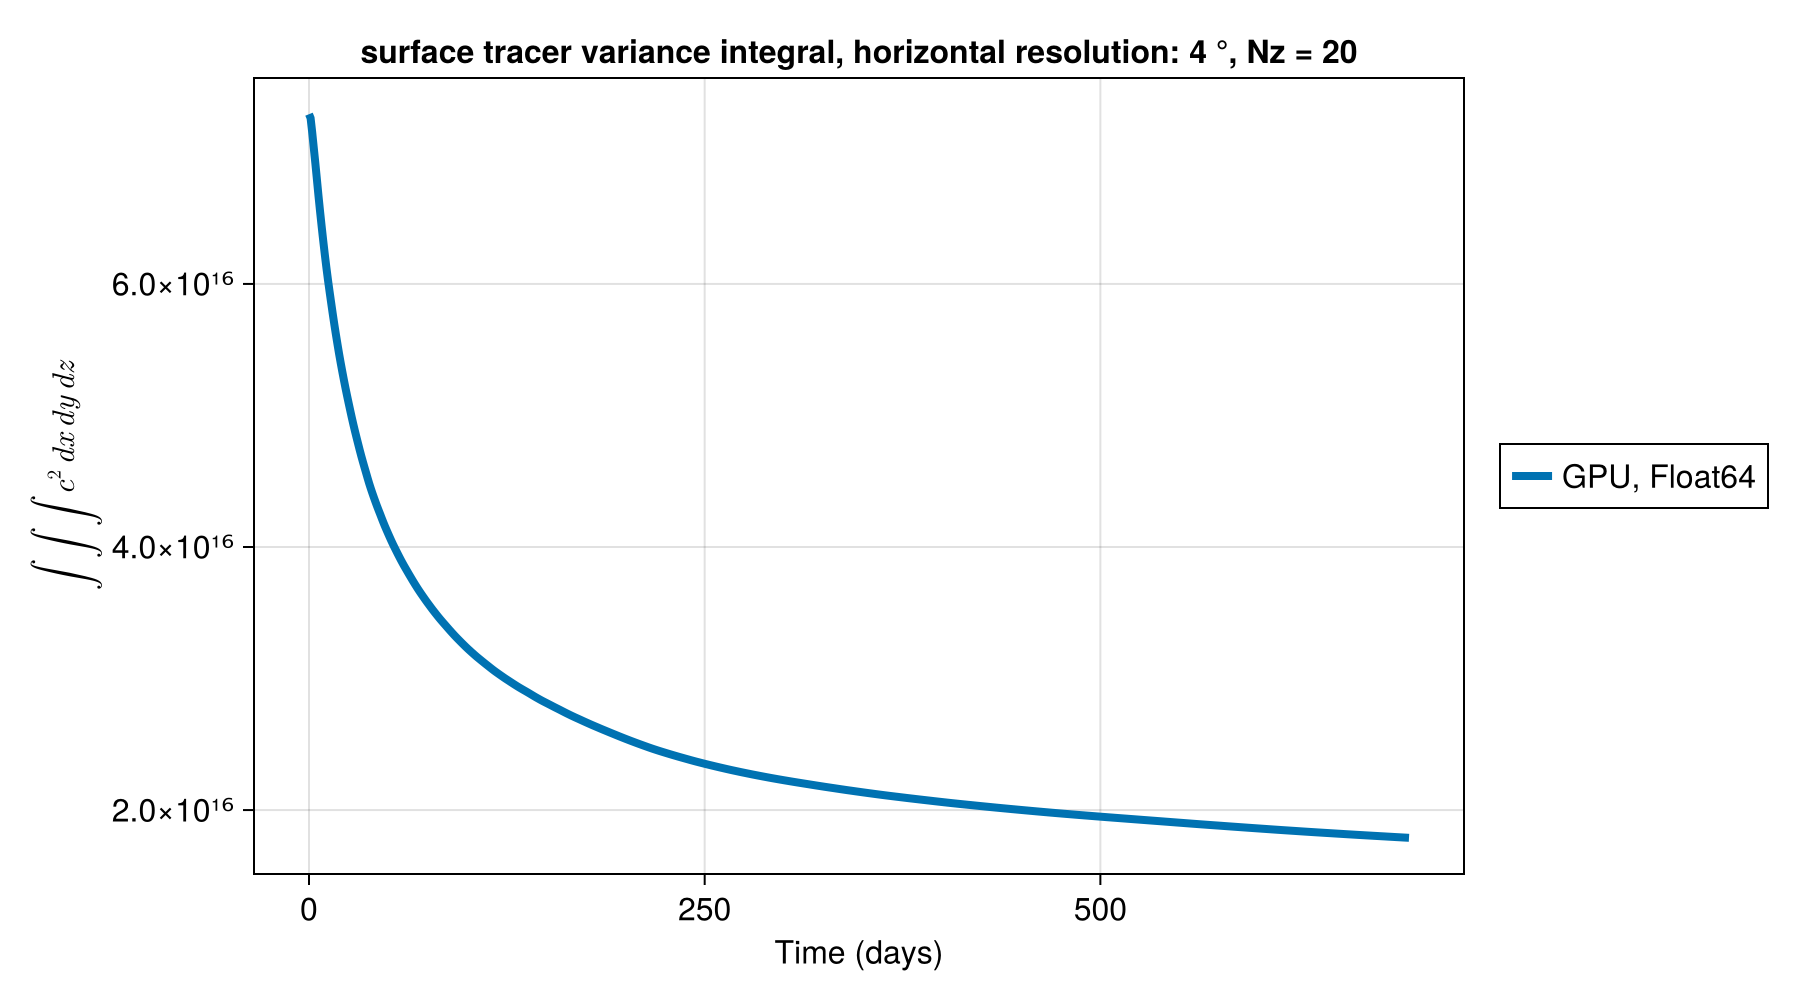

In [66]:
vis_tracer_variance_evol(dir; resolution=4, Nz=20, surface=true)

A gradually decreasing trace variance over time makes sense.

Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_Reactant_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_Reactant_integrals.jld2


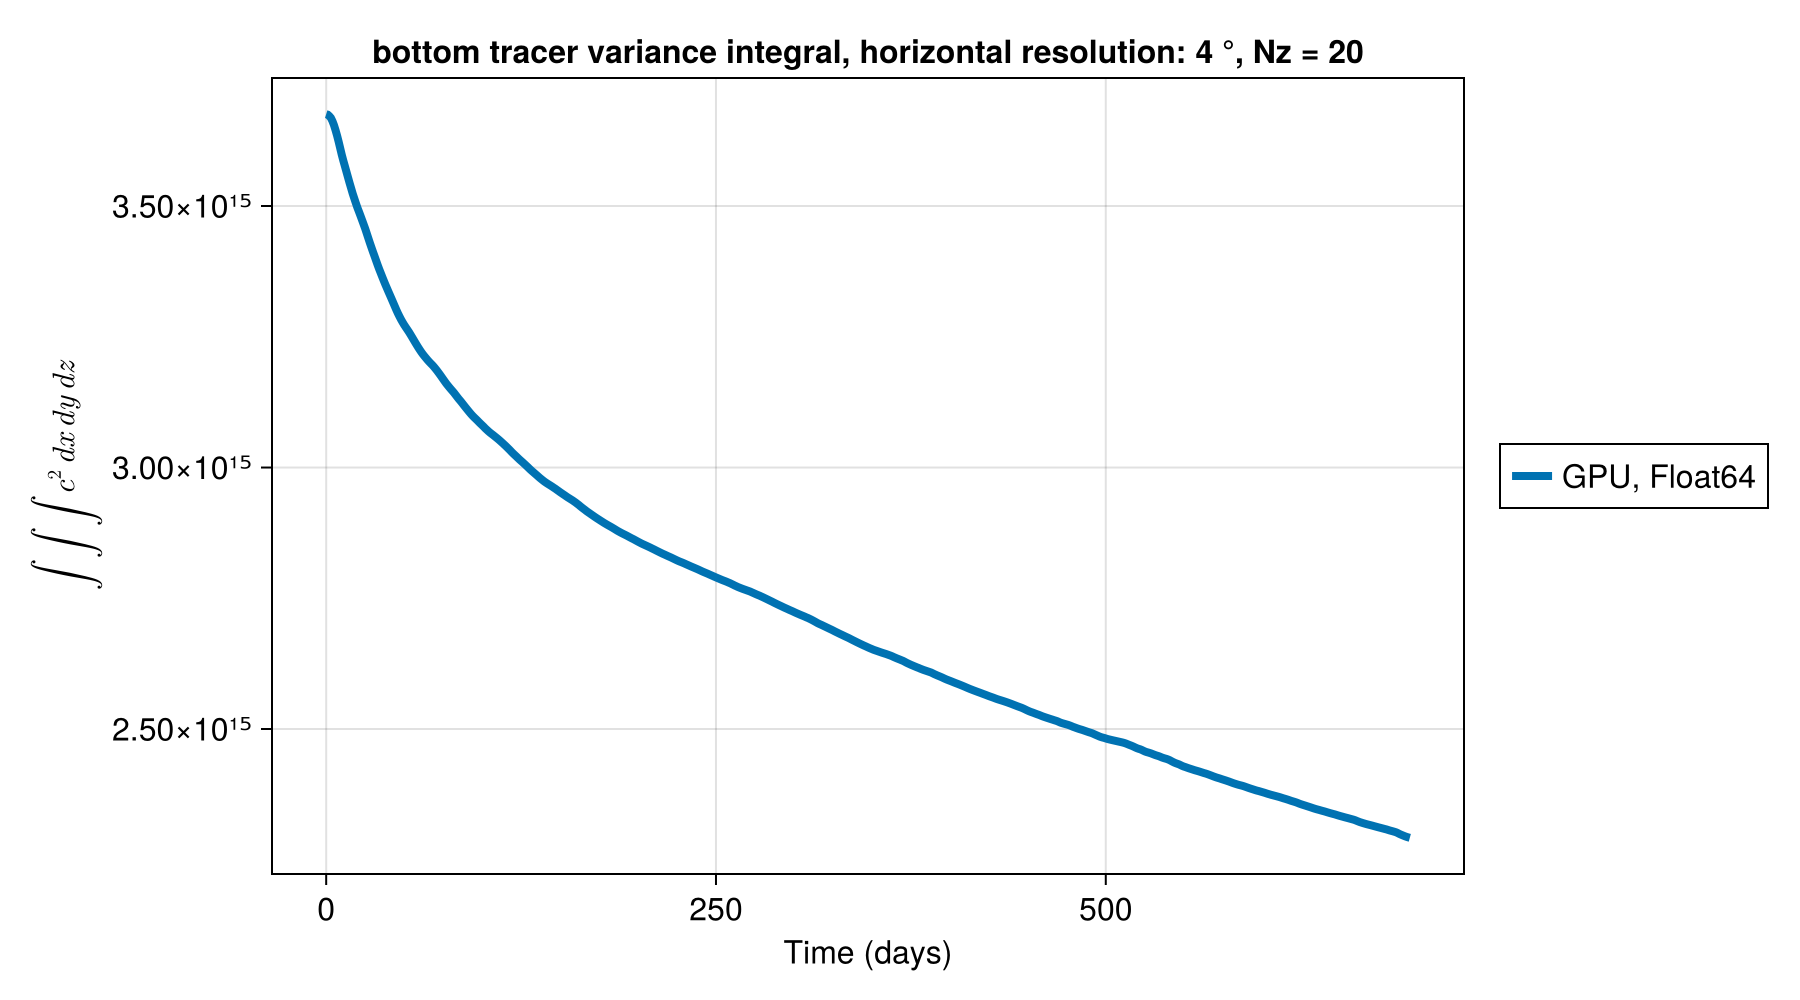

In [67]:
vis_tracer_variance_evol(dir; resolution=4, Nz=20, surface=false)

### Check tracer conservation

In [68]:
function vis_tracer_conservation_evol(dir; resolution, Nz, momentum_advection_order=5, tracer_advection_order=5, vorticity_order=nothing)
    pt = 4 / 3
    fig = Figure(; size=(900, 500), fontsize=12pt)

    ylabel = L"\frac{|\int \int \int c(t) \, dx \, dy \, dz - \int \int \int c(0) \, dx \, dy \, dz |}{ \int \int \int c(0) \, dx \, dy \, dz}"

    title = "Tracer conservation error, horizontal resolution: $resolution °, Nz = $Nz"
    ax = Axis(fig[1, 1], xlabel="Time (days)", ylabel=ylabel, title=title)

    # Get file prefix
    if resolution isa Rational
        res_str = "$(numerator(resolution))_$(denominator(resolution))"
    else
        res_str = "$(Int(resolution))"
    end
    vort_str = vorticity_order !== nothing ? "_vort$(vorticity_order)" : ""

    for arch_str in ["GPU", "Reactant"]
        for FT in [Float32, Float64]
            # Generate prefix using parameter values
            prefix = (
                "Degree$(res_str)_Nz$(Nz)_"
                * "momadv$(momentum_advection_order)_tradv$(tracer_advection_order)"
                * vort_str * "_$(FT)_$(arch_str)"
            )
            filename = joinpath(dir, prefix * "_integrals.jld2")
            println("Checking file: ", filename)

            if isfile(filename)
                Ct_surface = FieldTimeSeries(filename, "surface_tracer_integral")
                Ct_bottom = FieldTimeSeries(filename, "bottom_tracer_integral")

                Ct_surface_error = abs.((Ct_surface.data[1, 1, 1, :] .- Ct_surface.data[1, 1, 1, 1]) ./ Ct_surface.data[1, 1, 1, 1])
                Ct_bottom_error = abs.((Ct_bottom.data[1, 1, 1, :] .- Ct_bottom.data[1, 1, 1, 1]) ./ Ct_bottom.data[1, 1, 1, 1])
                    
                times = Ct_surface.times / 3600 / 24
                    
                label = ("surface tracer, $arch_str, $FT")
                lines!(ax, times, Ct_surface_error, linewidth=4, label=label)
                label = ("bottom tracer, $arch_str, $FT")
                lines!(ax, times, Ct_bottom_error, linewidth=4, label=label)
            end
        end
    end
    # Add legend
    legend = Legend(fig[1, 2], ax, orientation=:vertical)  # One column
    return fig
end

vis_tracer_conservation_evol (generic function with 1 method)

Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_GPU_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float32_Reactant_integrals.jld2
Checking file: /pscratch/sd/n/nloose/GB-25/simulations/Degree4_Nz20_momadv5_tradv5_Float64_Reactant_integrals.jld2


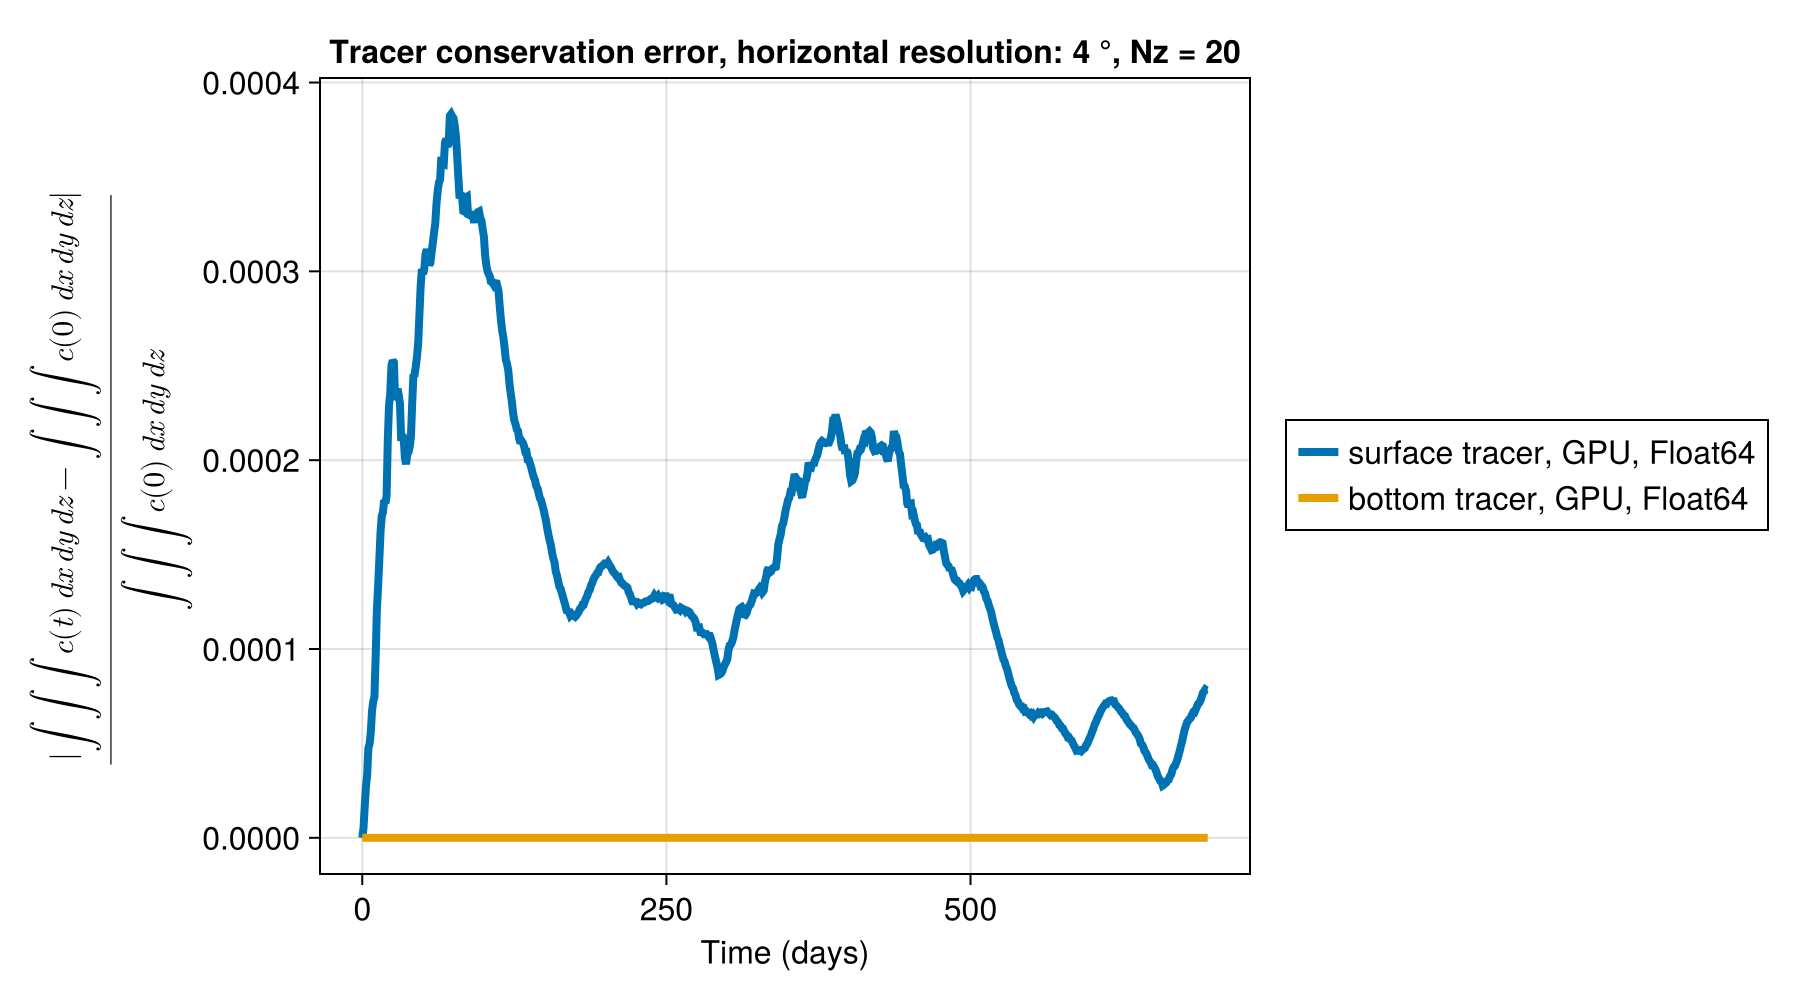

In [69]:
vis_tracer_conservation_evol(dir; resolution=4, Nz=20)

Wow, a relative error of $10^{-4}$ is much higher than expected. It seems the simulation used a z vertical coordinate instead of **z-star**, as intended. This is especially evident because the surface tracer is not conserved. I’ll investigate this further.